<a href="https://colab.research.google.com/github/akhilerla/IT496/blob/main/AkhilE_A11_Critical_Path_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this is just a model code, the complete code you'll have to figure out
import pandas as pd 
import tensorflow_probability as tfp 
import seaborn as  sns
tfd = tfp.distributions 
#you can receive this from an input table 
tasksDF=pd. read_csv("/content/drive/MyDrive/PERT-CPM.csv")
print(tasksDF)
taskNames=tasksDF["tasks"]


   tasks     pred  best  mostL  worst
0      A      NaN     3      6      9
1      B      NaN     2      5      6
2      C        B     2      3      7
3      D      A,C     1      3      3
4      E        D     0      7      8
5      F        C     1      2     10
6      G        F     3      4     12
7      H        F     1      2     15
8      I        B     5     10     30
9      J  E, G, H     1      3      4
10   EOP      I,J     0      0      0


In [ ]:
#creating simulation dataframe
simulationDF=pd.DataFrame(columns=taskNames)


In [ ]:
for index, task in tasksDF.iterrows():
  dist=tfd.PERT(low= task['best'], peak= task['mostL'], high= task['worst'], temperature=4)
  simulationDF [task['tasks']]=dist.sample(1000)


In [ ]:
simulationDF

tasks,A,B,C,D,E,F,G,H,I,J,EOP
0,6.514871,3.746465,3.038957,2.809931,7.614470,2.851703,5.038572,2.182593,8.929644,2.165846,NaN
1,6.692449,4.649941,2.883830,2.988985,5.285487,2.462008,5.083481,3.382630,9.669306,3.098135,NaN
2,7.342938,3.307263,4.015971,1.887607,5.290269,2.214165,4.223399,6.511069,9.734610,2.984471,NaN
3,7.486207,5.624015,3.049855,2.985826,4.515961,5.448956,4.268992,1.407291,13.201499,2.045957,NaN
4,7.380667,4.246385,2.758939,2.851313,5.299401,3.770123,3.785692,1.201694,9.064728,2.864746,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,5.995068,5.240914,3.386845,2.909386,6.628034,1.063956,6.310931,2.871307,15.944480,2.676845,NaN
996,5.244289,4.425023,2.446396,2.712959,5.779159,3.563540,4.966512,5.039907,9.332947,2.660851,NaN
997,5.450655,4.936197,2.355601,2.924160,3.741511,1.729962,5.795296,3.243958,8.316843,3.109492,NaN
998,5.809759,4.116305,3.753242,2.758305,4.336877,1.385211,3.326516,1.940848,14.968498,2.726553,NaN


In [ ]:
simulationDF['ADEJ'] = simulationDF['A'] + simulationDF['D'] + simulationDF['E'] + simulationDF['J']
simulationDF['BCDEJ'] = simulationDF['B'] + simulationDF['C'] +simulationDF['D'] + simulationDF['E'] + simulationDF['J']
simulationDF['BCFGH'] = simulationDF['B'] + simulationDF['C'] +simulationDF['F'] + simulationDF['G'] + simulationDF['H']
simulationDF['BCFHJ'] = simulationDF['B'] + simulationDF['C'] +simulationDF['F'] + simulationDF['H'] + simulationDF['J']
simulationDF['BI'] = simulationDF['B'] + simulationDF['I'] 

In [ ]:
simulationDF

tasks,A,B,C,D,E,F,G,H,I,J,EOP,ADEJ,BCDEJ,BCFGH,BCFHJ,BI
0,6.514871,3.746465,3.038957,2.809931,7.614470,2.851703,5.038572,2.182593,8.929644,2.165846,NaN,19.105118,19.375668,16.858290,13.985563,12.676108
1,6.692449,4.649941,2.883830,2.988985,5.285487,2.462008,5.083481,3.382630,9.669306,3.098135,NaN,18.065056,18.906378,18.461889,16.476543,14.319247
2,7.342938,3.307263,4.015971,1.887607,5.290269,2.214165,4.223399,6.511069,9.734610,2.984471,NaN,17.505285,17.485582,20.271868,19.032940,13.041873
3,7.486207,5.624015,3.049855,2.985826,4.515961,5.448956,4.268992,1.407291,13.201499,2.045957,NaN,17.033951,18.221615,19.799110,17.576073,18.825514
4,7.380667,4.246385,2.758939,2.851313,5.299401,3.770123,3.785692,1.201694,9.064728,2.864746,NaN,18.396128,18.020782,15.762833,14.841887,13.311112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.995068,5.240914,3.386845,2.909386,6.628034,1.063956,6.310931,2.871307,15.944480,2.676845,NaN,18.209332,20.842022,18.873953,15.239866,21.185394
996,5.244289,4.425023,2.446396,2.712959,5.779159,3.563540,4.966512,5.039907,9.332947,2.660851,NaN,16.397257,18.024387,20.441380,18.135717,13.757970
997,5.450655,4.936197,2.355601,2.924160,3.741511,1.729962,5.795296,3.243958,8.316843,3.109492,NaN,15.225818,17.066961,18.061014,15.375209,13.253040
998,5.809759,4.116305,3.753242,2.758305,4.336877,1.385211,3.326516,1.940848,14.968498,2.726553,NaN,15.631495,17.691282,14.522120,13.922159,19.084803


In [ ]:
simulationDF['Crictical_path'] = simulationDF.idxmax(axis = 1)
simulationDF


tasks,A,B,C,D,E,F,G,H,I,J,EOP,ADEJ,BCDEJ,BCFGH,BCFHJ,BI,Crictical_path
0,6.514871,3.746465,3.038957,2.809931,7.614470,2.851703,5.038572,2.182593,8.929644,2.165846,NaN,19.105118,19.375668,16.858290,13.985563,12.676108,BCDEJ
1,6.692449,4.649941,2.883830,2.988985,5.285487,2.462008,5.083481,3.382630,9.669306,3.098135,NaN,18.065056,18.906378,18.461889,16.476543,14.319247,BCDEJ
2,7.342938,3.307263,4.015971,1.887607,5.290269,2.214165,4.223399,6.511069,9.734610,2.984471,NaN,17.505285,17.485582,20.271868,19.032940,13.041873,BCFGH
3,7.486207,5.624015,3.049855,2.985826,4.515961,5.448956,4.268992,1.407291,13.201499,2.045957,NaN,17.033951,18.221615,19.799110,17.576073,18.825514,BCFGH
4,7.380667,4.246385,2.758939,2.851313,5.299401,3.770123,3.785692,1.201694,9.064728,2.864746,NaN,18.396128,18.020782,15.762833,14.841887,13.311112,ADEJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.995068,5.240914,3.386845,2.909386,6.628034,1.063956,6.310931,2.871307,15.944480,2.676845,NaN,18.209332,20.842022,18.873953,15.239866,21.185394,BI
996,5.244289,4.425023,2.446396,2.712959,5.779159,3.563540,4.966512,5.039907,9.332947,2.660851,NaN,16.397257,18.024387,20.441380,18.135717,13.757970,BCFGH
997,5.450655,4.936197,2.355601,2.924160,3.741511,1.729962,5.795296,3.243958,8.316843,3.109492,NaN,15.225818,17.066961,18.061014,15.375209,13.253040,BCFGH
998,5.809759,4.116305,3.753242,2.758305,4.336877,1.385211,3.326516,1.940848,14.968498,2.726553,NaN,15.631495,17.691282,14.522120,13.922159,19.084803,BI


In [ ]:
frequency =  simulationDF['Crictical_path'].value_counts().to_frame()
frequency

,Crictical_path
BCFGH,449
BCDEJ,306
BI,201
ADEJ,36
BCFHJ,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


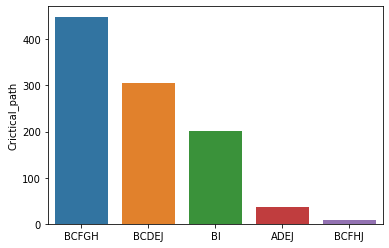

In [ ]:
sns.barplot( frequency.index,frequency.Crictical_path)